In [28]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
#DATASET LOAD
file_path = "C:\\Users\\nikhi\\Downloads\\UIDAI_2026.csv"
df = pd.read_csv(file_path)

df.head()


,Date,Day,Month,Year,State,District,Pincode,Age 5 To 17,Age Above 17
0,1/3/2025,Friday,January,2025,Telangana,Mulugu,506172,24,281
1,1/3/2025,Friday,January,2025,Telangana,Karimnagar,505452,39,138
2,1/3/2025,Friday,January,2025,Telangana,Nalgonda,508105,29,78
3,1/3/2025,Friday,January,2025,Telangana,Narayanpet,509130,22,120
4,1/3/2025,Friday,January,2025,Telangana,Sangareddy,502319,132,673


In [29]:
#Basic Data Inspection
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44831 entries, 0 to 44830
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          44831 non-null  object
 1   Day           44831 non-null  object
 2   Month         44831 non-null  object
 3   Year          44831 non-null  int64 
 4   State         44831 non-null  object
 5   District      44831 non-null  object
 6   Pincode       44831 non-null  int64 
 7   Age 5 To 17   44831 non-null  int64 
 8   Age Above 17  44831 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.1+ MB


,Year,Pincode,Age 5 To 17,Age Above 17
count,44831.0,44831.000000,44831.000000,44831.000000
mean,2025.0,504920.331489,2.721376,15.695635
std,0.0,2969.629237,12.943661,67.594110
min,2025.0,500001.000000,0.000000,0.000000
25%,2025.0,502300.500000,0.000000,2.000000
50%,2025.0,505416.000000,1.000000,6.000000
75%,2025.0,507158.000000,2.000000,14.000000
max,2025.0,509412.000000,571.000000,2746.000000


In [36]:
#Clean the Dataset
#Remove Column Spacing Issues
df.columns = df.columns.str.strip()


In [37]:
#Convert Date Column to DateTime
df['Date'] = pd.to_datetime(df['Date'])


In [38]:
#Verify Clean Data
df.isnull().sum()


Date            0
Day             0
Month           0
Year            0
State           0
District        0
Pincode         0
Age 5 To 17     0
Age Above 17    0
dtype: int64

In [39]:
#Define Aadhaar Dependency Groups
df['Total_Aadhaar'] = df['Age 5 To 17'] + df['Age Above 17']


In [34]:
#Day-Wise Aadhaar Authentication Analysis
daywise = df.groupby('Date')[[
    'Age 5 To 17',
    'Age Above 17',
    'Total_Aadhaar'
]].sum()

daywise.head()


,Age 5 To 17,Age Above 17,Total_Aadhaar
Date,,,
2025-01-03,27763,137257,165020
2025-01-04,1957,12375,14332
2025-01-05,2607,13707,16314
2025-01-06,4952,23377,28329
2025-01-07,6411,42383,48794


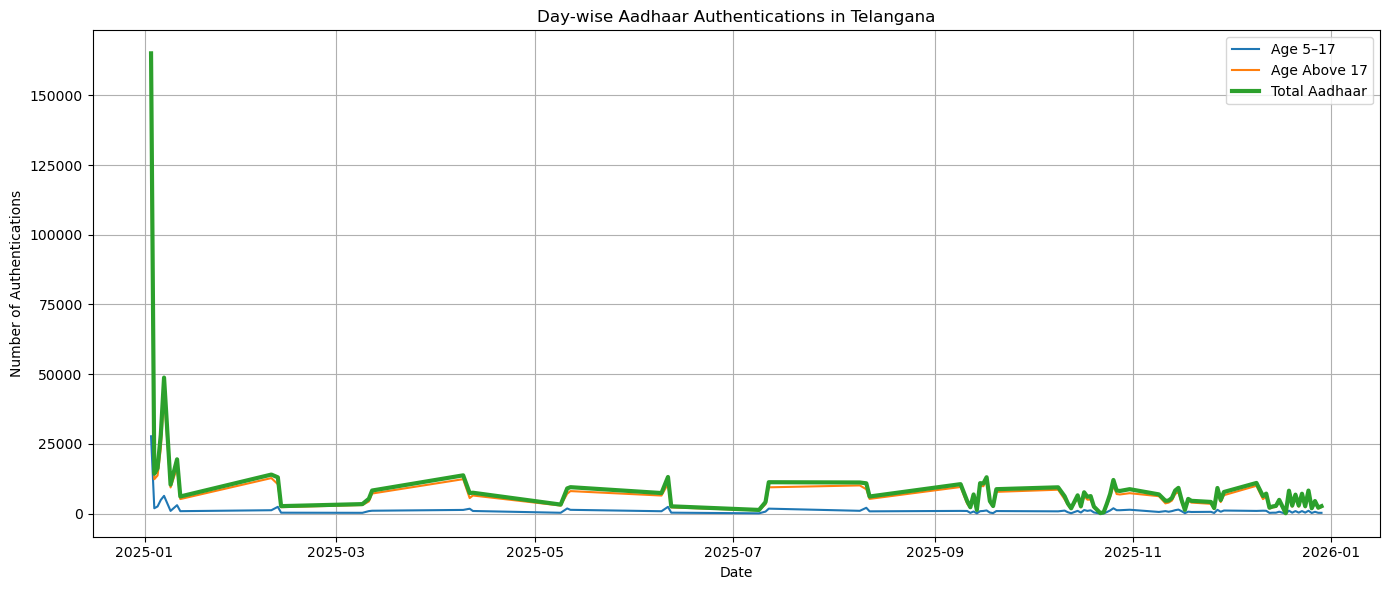

In [13]:
#Day-Wise Line Chart (Government-Style)
plt.figure(figsize=(14,6))
plt.plot(daywise.index, daywise['Age 5 To 17'], label='Age 5–17')
plt.plot(daywise.index, daywise['Age Above 17'], label='Age Above 17')
plt.plot(daywise.index, daywise['Total_Aadhaar'], label='Total Aadhaar', linewidth=3)

plt.title('Day-wise Aadhaar Authentications in Telangana')
plt.xlabel('Date')
plt.ylabel('Number of Authentications')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
#Day-of-Week Aadhaar Usage
weekdaywise = df.groupby('Day')[[
    'Age 5 To 17',
    'Age Above 17',
    'Total_Aadhaar'
]].sum()

weekdaywise


,Age 5 To 17,Age Above 17,Total_Aadhaar
Day,,,
Friday,38964,196817,235781
Monday,13532,76290,89822
Saturday,17999,107729,125728
Sunday,14070,81894,95964
Thursday,8707,55932,64639
Tuesday,19017,121372,140389
Wednesday,9713,63617,73330


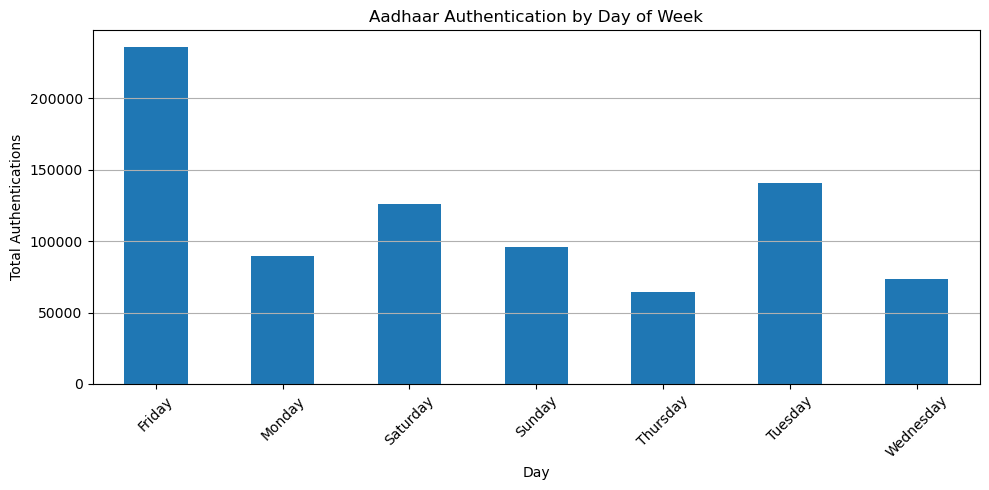

In [15]:
#Day-of-Week Bar Chart
plt.figure(figsize=(10,5))
weekdaywise['Total_Aadhaar'].plot(kind='bar')

plt.title('Aadhaar Authentication by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Authentications')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [16]:
#Month-Wise Aadhaar Trend
monthwise = df.groupby('Month')[[
    'Age 5 To 17',
    'Age Above 17',
    'Total_Aadhaar'
]].sum()

monthwise


,Age 5 To 17,Age Above 17,Total_Aadhaar
Month,,,
April,4149,24553,28702
August,4044,24240,28284
December,11839,76059,87898
February,4111,25707,29818
January,48695,260217,308912
July,2740,14102,16842
June,3749,19504,23253
March,2355,14777,17132
May,3640,18236,21876


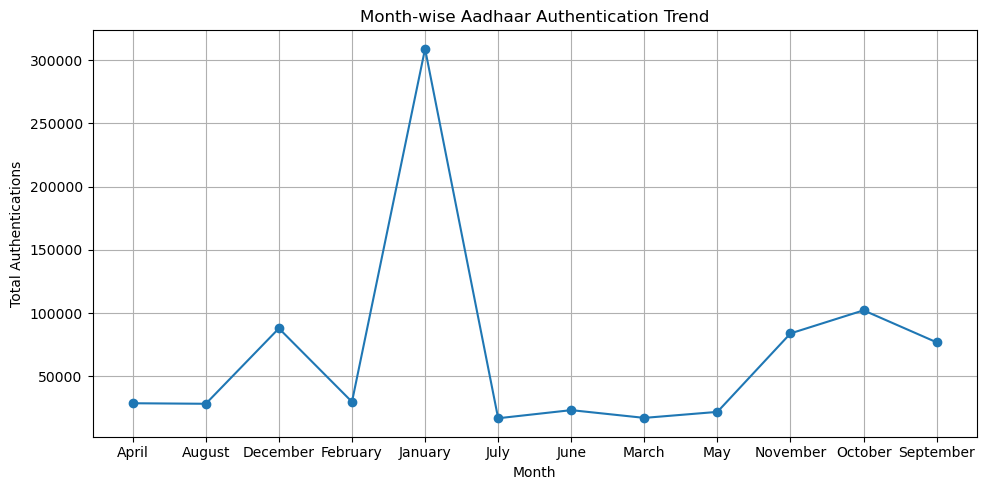

In [17]:
#Month-Wise Trend Visualization
plt.figure(figsize=(10,5))
plt.plot(monthwise.index, monthwise['Total_Aadhaar'], marker='o')

plt.title('Month-wise Aadhaar Authentication Trend')
plt.xlabel('Month')
plt.ylabel('Total Authentications')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
#Year-Wise Growth Analysis
yearwise = df.groupby('Year')[[
    'Age 5 To 17',
    'Age Above 17',
    'Total_Aadhaar'
]].sum()

yearwise


,Age 5 To 17,Age Above 17,Total_Aadhaar
Year,,,
2025,122002,703651,825653


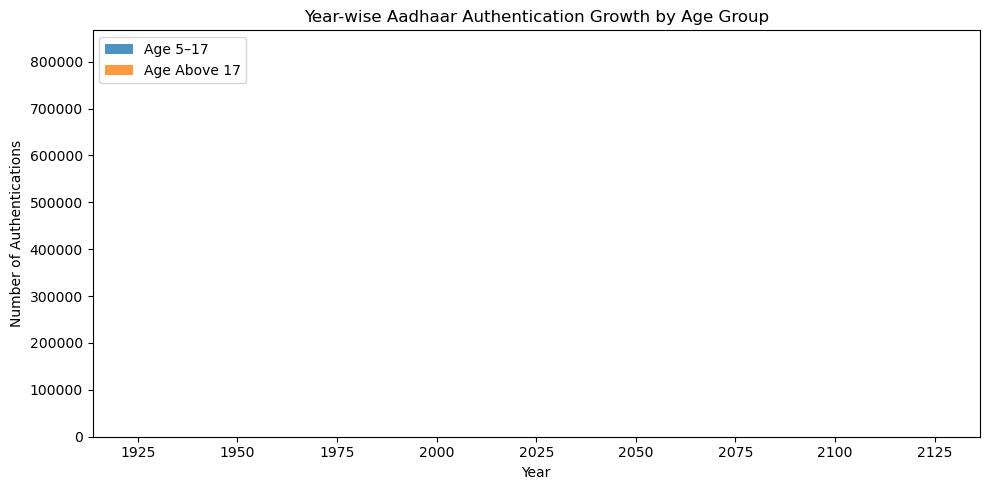

In [19]:
#Area Chart (Demographic Growth)
plt.figure(figsize=(10,5))
plt.stackplot(
    yearwise.index,
    yearwise['Age 5 To 17'],
    yearwise['Age Above 17'],
    labels=['Age 5–17', 'Age Above 17'],
    alpha=0.8
)

plt.title('Year-wise Aadhaar Authentication Growth by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Authentications')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
#District-Wise Aadhaar Load (Public Transparency)
districtwise = df.groupby('District')[[
    'Age 5 To 17',
    'Age Above 17',
    'Total_Aadhaar'
]].sum().sort_values(by='Total_Aadhaar', ascending=False)

districtwise.head()


,Age 5 To 17,Age Above 17,Total_Aadhaar
District,,,
Hyderabad,16854,94778,111632
K.v. Rangareddy,15951,82932,98883
Mahabubnagar,11997,38145,50142
Medchal-malkajgiri,7011,36019,43030
Karimnagar,5136,37445,42581


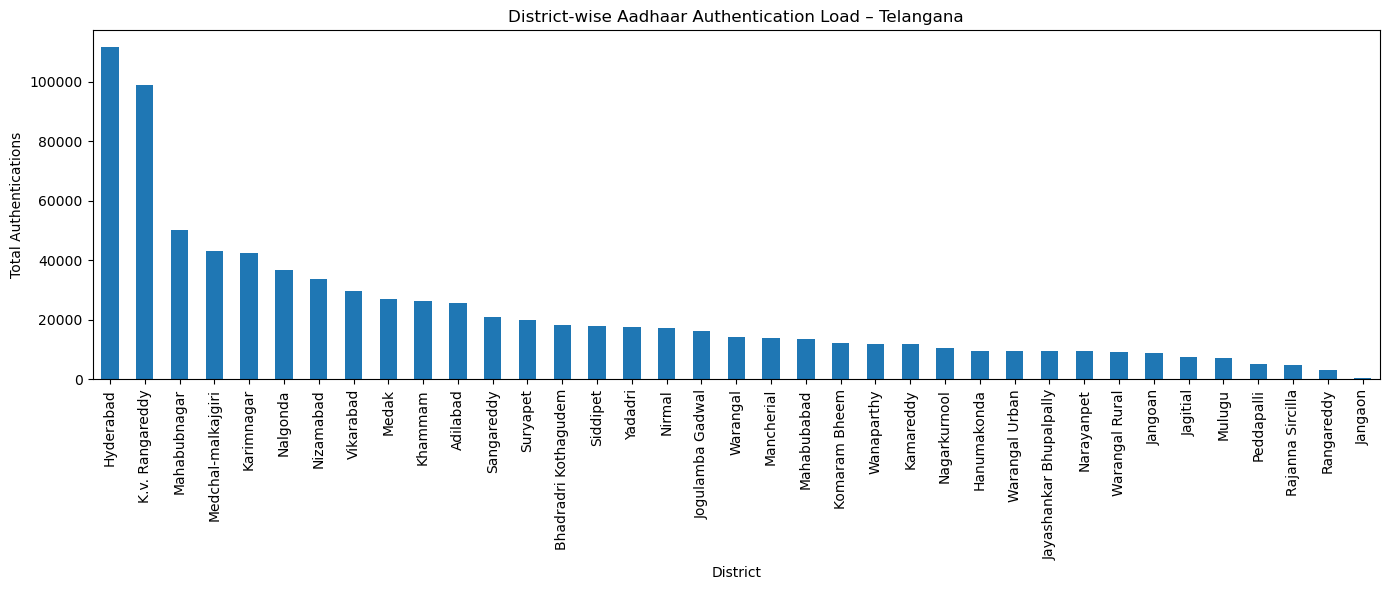

In [21]:
#District-Wise Bar Chart
plt.figure(figsize=(14,6))
districtwise['Total_Aadhaar'].plot(kind='bar')

plt.title('District-wise Aadhaar Authentication Load – Telangana')
plt.xlabel('District')
plt.ylabel('Total Authentications')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [22]:
#Statistical Measures (Official Reporting)
districtwise.describe()


,Age 5 To 17,Age Above 17,Total_Aadhaar
count,37.000000,37.000000,37.000000
mean,3297.351351,19017.594595,22314.945946
std,3922.725712,19524.411343,23331.620387
min,44.000000,369.000000,413.000000
25%,984.000000,8645.000000,9608.000000
50%,1842.000000,12214.000000,14289.000000
75%,3914.000000,22248.000000,26162.000000
max,16854.000000,94778.000000,111632.000000


In [23]:
#Aadhaar Digital Load Index
districtwise['Digital_Load_Index'] = (
    districtwise['Total_Aadhaar'] / districtwise['Total_Aadhaar'].sum()
)

districtwise[['Digital_Load_Index']].head()


,Digital_Load_Index
District,
Hyderabad,0.135204
K.v. Rangareddy,0.119763
Mahabubnagar,0.060730
Medchal-malkajgiri,0.052116
Karimnagar,0.051573


***=> What This Project Achieves***

Transparent Aadhaar usage exposure

Time-based public insights

District-wise digital dependency

Professional visual storytelling

Government & academic ready